# Import libraries

In [1]:
from nbconvert import PythonExporter
import nbformat
import sys
import os
import numpy as np
import pandas as pd
from helpers import parse_variables, get_risk_level, hi_gauss_blob_risk_fun, blob_risk_fun, NW_risk_fun, square_risk_fun, map_to_color
import nbformat
from nbconvert import PythonExporter
from nbconvert.preprocessors import ExecutePreprocessor
from IPython.core.interactiveshell import InteractiveShell

#original_stdout = sys.stdout
#sys.stdout = open('/dev/null', 'w') # Avoid the outputs from the terminal to be displayed

# Start scripts

In [2]:
"""
function to run notebooks from a distance and to eventually pass variables
example:
variables = {'x': 10, 'y': 'hello'}
run_notebook('your_notebook.ipynb', variables)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
"""

def run_notebook(notebook_path, variables=None):
    # Load the notebook
    with open(notebook_path, 'r') as f:
        notebook = nbformat.read(f, as_version=4)
    
    # Inject variables into the notebook
    if variables:
        for cell in notebook.cells:
            if cell.cell_type == 'code':
                cell.source = f"{cell.source}\n{';'.join([f'{var} = {repr(value)}' for var, value in variables.items()])}"
    
    # Convert the notebook to a Python script
    exporter = PythonExporter()
    python_script, _ = exporter.from_notebook_node(notebook)
    
    # Execute the Python script
    shell = InteractiveShell.instance()
    output = shell.run_cell(python_script)
    
    # Check if the output has been captured
    if output.success:
        # Return the output
        return output.result
    else:
        # If execution failed, print the error message
        print("Error executing notebook cell:", output.error_in_exec)
        return None



In [3]:
os.listdir()

['data',
 'helpers.py',
 '.gitignore',
 '04 Simulate SNP effect.ipynb',
 '__pycache__',
 '00 Create synthetic geno HWE.ipynb',
 'kpop.so',
 'scripts',
 'geno_simulation.txt',
 '01 Create Synthetic Geno.ipynb',
 '.git',
 '99_run_everything.ipynb',
 '08 Create and Visualise PCs.ipynb',
 '05 Simulate environmental risk.ipynb',
 'Abyss',
 'rstudio_rare_var_simulation',
 'Deep PCA',
 'Deep Abyss',
 'kpop.R',
 'create_geno.R',
 '09 Analysis only environment.ipynb',
 '.ipynb_checkpoints',
 'pheno_simulation.txt',
 'coalescent.r',
 '06 Simulate interaction between snps (not now).ipynb',
 'notebooks',
 '07 Simulate Phenotypes.ipynb',
 '02 load and QC Synthetic Geno.ipynb',
 'simulated_genotypes_G20_L100_c50_k20_M0.5.csv',
 'association.R',
 '981 iterative pvalues.ipynb',
 '03 Simulate population structure.ipynb']

# Create synthetics genotype

In [ ]:
notebook_path = "01 Create Synthetic Geno.ipynb"
run_notebook(notebook_path)

# Quality Control

In [ ]:
notebook_path = "02 load and QC Synthetic Geno.ipynb"
run_notebook(notebook_path)

# Simulate population structure

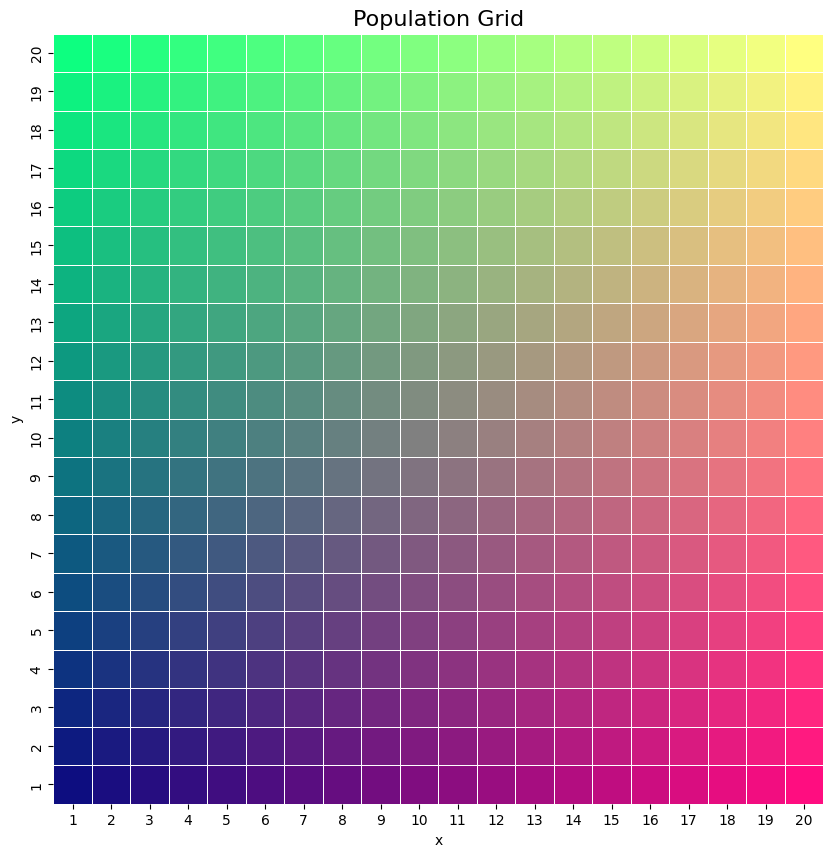

In [15]:
notebook_path = "03 Simulate population structure.ipynb"
run_notebook(notebook_path)

# Simulate SNP effect

mono
rare
1


/tmp/ipykernel_10471/809586770.py:86: RuntimeWarning: divide by zero encountered in scalar divide
  t_values = beta_hat / se_beta
/tmp/ipykernel_10471/809586770.py:86: RuntimeWarning: divide by zero encountered in scalar divide
  t_values = beta_hat / se_beta


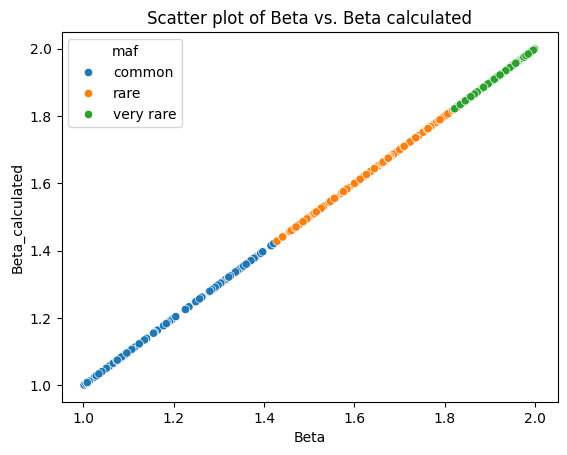

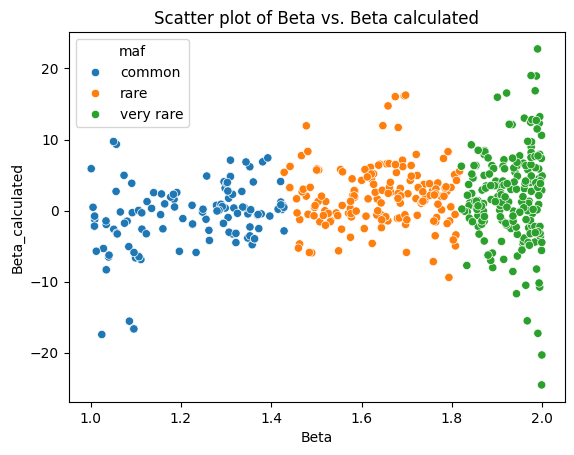

In [16]:
variables = {'type': "mono", "maftype": "common"}
notebook_path = "04 Simulate SNP effect.ipynb"
run_notebook(notebook_path, variables)

# Create environmental risk

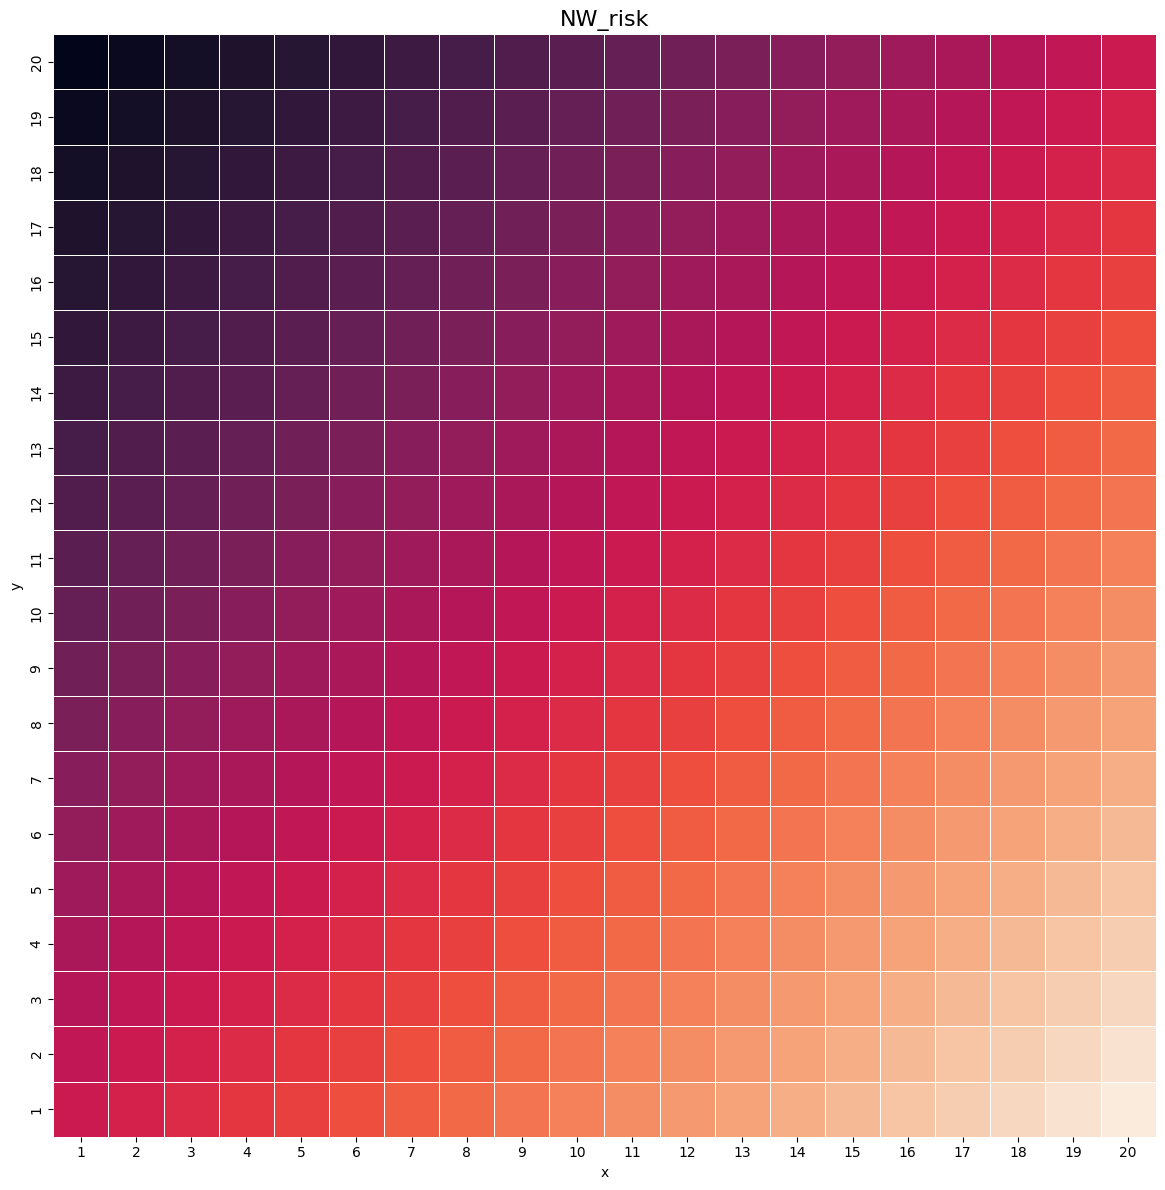

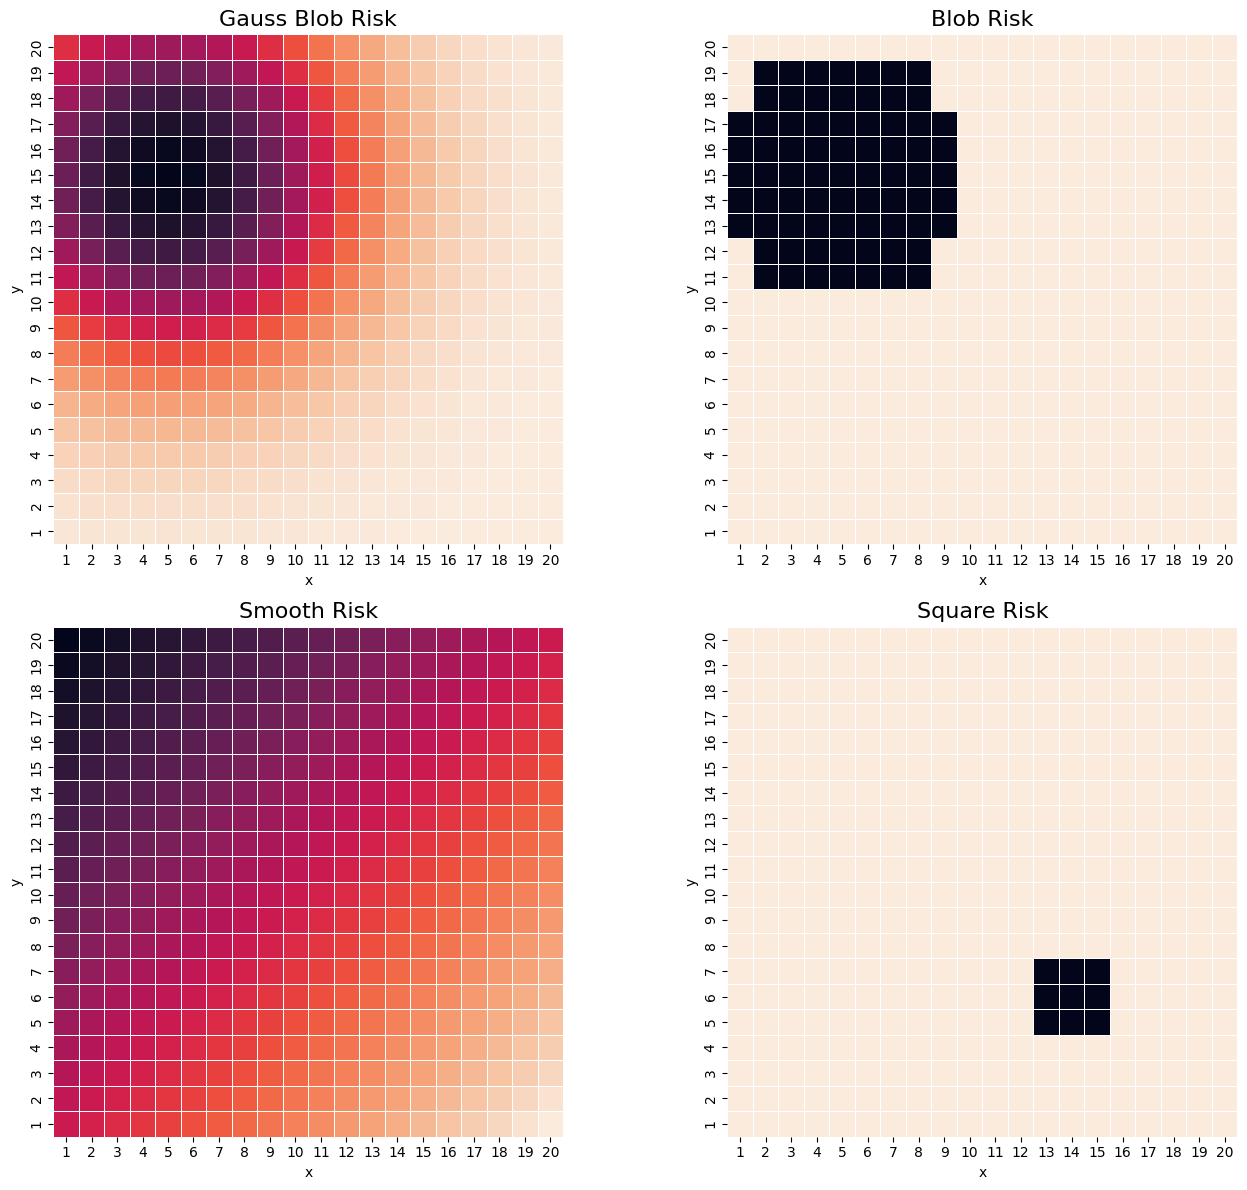

In [19]:
notebook_path = "05 Simulate environmental risk and case controls only env.ipynb"
run_notebook(notebook_path)

# Create and visualize PCs

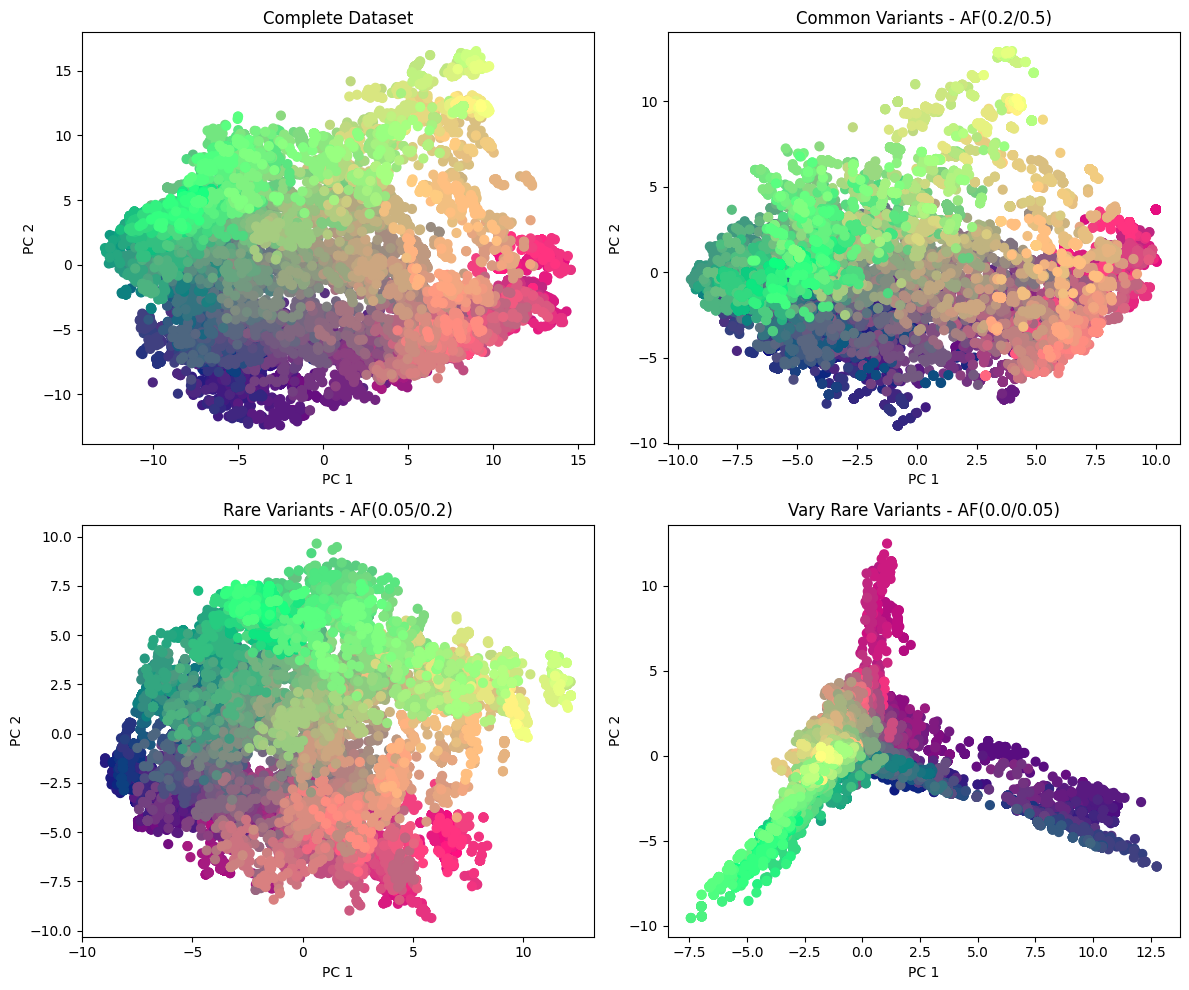

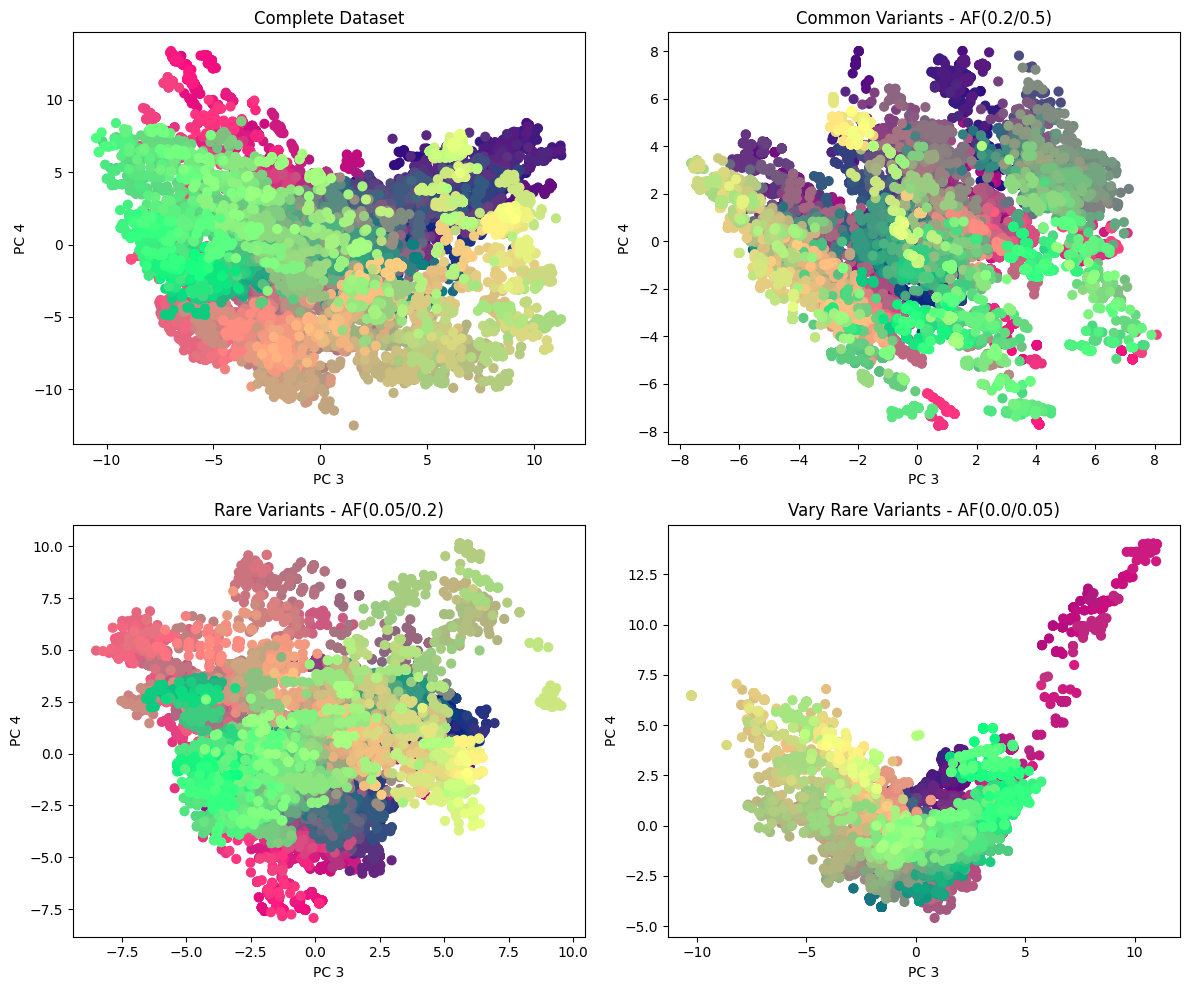

In [18]:
notebook_path = "08 Create and Visualise PCs.ipynb"
run_notebook(notebook_path)

# Run correction

In [9]:
#sys.stdout = original_stdout

NameError: name 'original_stdout' is not defined